In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pycalphad import Database, equilibrium, variables as v
from time import time
import xarray as xr

/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dbfile = '/Users/brandon/Box Sync/databases/nims-databases/Cr-Ti-V.tdb'
dbf = Database(dbfile)
comps = ['CR', 'TI', 'V', 'VA']
phases = list(dbf.phases.keys())

In [3]:
conditions = {v.P:101325, v.T: 873, v.X('TI'): (0, 1, 0.01), v.X('V'): (0, 1, 0.01)}
start = time()
eq = equilibrium(dbf, comps, phases, conditions)
print('Walltime: {}'.format(time()-start))

/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/dask/async.py:13: UserWarning: `dask.async.get_sync` has been moved to `dask.local.get_sync`, please update your imports
  warnings.warn(_msg.format('get_sync'))
/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:146: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.7000000000000001)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.64)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.65)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.58)), ('X_V', array(0.02))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.79)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.56)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.36)), ('X_V', array(0.64))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.58)), ('X_V', array(0.0

In [13]:
eq.attrs['created'] = '2017-07-31 18:43:57.493555'
eq.to_netcdf('Cr-Ti-V_equil.nc')

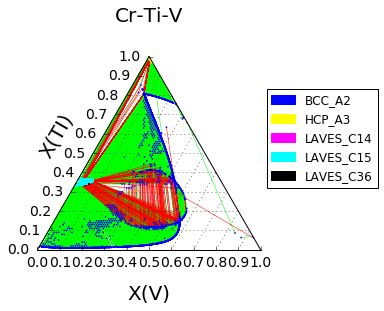

In [3]:
eq = xr.open_dataset('Cr-Ti-V_equil.nc')
eq
from pycalphad.plot.eqplot import eqplot
eqplot(eq, x=v.X('V'), y=v.X('TI'))

In [22]:
import numpy as np
print(np.sum(np.ravel(eq.GM.values < 0)))
print(np.ravel(eq.GM.values).shape)

5147
(10000,)


/Users/brandon/anaconda3/envs/pycalphad_ipopt/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [56]:
idx = np.nonzero(~(eq.GM.values < 0))
p = eq.X_TI.values[idx[0]]
t = eq.X_TI.values[idx[1]]
xti = eq.X_TI.values[idx[2]]
xv = eq.X_V.values[idx[3]]

/Users/brandon/anaconda3/envs/pycalphad_ipopt/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [68]:
#import pandas as pd
#df = pd.DataFrame({'P': p, 'T': t, 'X_TI': xti, 'X_V': xv, x})
np.nonzero((xti+xv) <= 1)
xv[1]

1.0000000000000001e-09

/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:146: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.45)), ('X_V', array(0.55))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.36)), ('X_V', array(0.64))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.38)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.39)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.5)), ('X_V', array(0.5))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.72)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.4)), ('X_V', array(0.01))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(873.0)), ('X_TI', array(0.41000000000000003)), ('X_V', array(0.01)

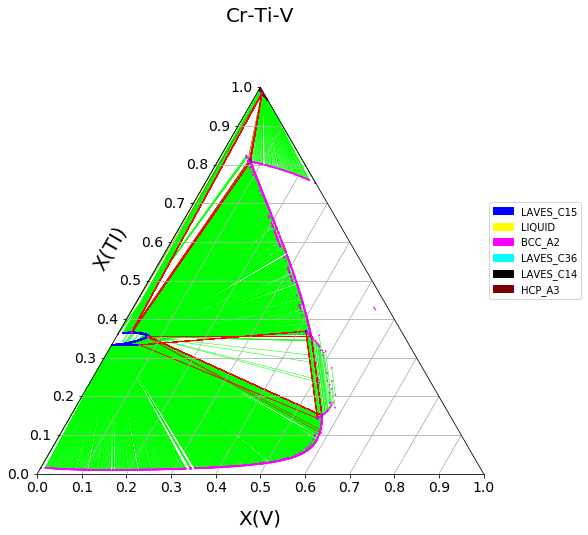

In [3]:
start = time()
fig = plt.figure(figsize=(10,10))
equilibrium(dbf, comps, phases, conditions, x=v.X('V'), y=v.X('TI'))
print('Walltime: {}'.format(time()-start))

In [5]:
start = time()
fig = plt.figure(figsize=(10,10))
equilibrium(dbf, comps, phases, conditions, x=v.X('V'), y=v.X('TI'), verbose=True)
print('Walltime: {}'.format(time()-start))

Calculation Backend: Compiled (autowrap)
Components: CR TI V VA
Phases: BCC_A2 HCP_A3 LAVES_C14 LAVES_C15 LAVES_C36 LIQUID [done]
Removing CompositionSet(BCC_A2, [ 0.35291516  0.09105566  0.55602918], NP=nan)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.59259259  0.33333333  0.07407407], NP=0.2786109531063917), CompositionSet(BCC_A2, [ 0.23633263  0.33641237  0.427255  ], NP=0.7213890468936084)])
('reduced_hessian eigenvalues', array([  2.80056965e+03,   6.77942253e+03,   1.53156858e+14,
         4.61407628e+14,   5.85075070e+14]))
('NEW_L_MULTIPLIERS', array([ -2721.86000396,  -7969.82204001,   5969.12481136, -17646.92697759,
       -40817.87659089, -39159.38227928, -42672.06800983]))
('L_CONSTRAINTS', array([ -1.52655666e-16,  -1.99922887e-16,   0.00000000e+00,
         0.00000000e+00,  -6.44094457e-02,   1.35554520e-01,
        -7.11450745e-02]))
('penalty', 10000)
('old_driving_force', -38502.295577732453, 0.13555452021137904)
('sublsum', -26.68214312557852)
(1.0, -41007.648

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.30568766  0.11784945  0.57646289], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.30568765  0.11784947  0.57646288], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.30568765  0.11784947  0.57646288], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.30568766  0.11784943  0.5764629 ], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.30568765  0.11784947  0.57646288], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.30568766  0.11784947  0.57646287], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.30568765  0.11784947  0.57646288], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.30568765  0.11784947  0.57646288], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.30568765  0.11784947  0.57646288], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.30568766  0.117849

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.30064842  0.12577724  0.57357434], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.30064842  0.12577724  0.57357434], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.30064843  0.12577722  0.57357435], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.30064842  0.12577724  0.57357434], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.30064842  0.12577725  0.57357433], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.30064842  0.12577724  0.57357434], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.30064842  0.12577723  0.57357435], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.30064842  0.12577725  0.57357433], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.30064842  0.12577724  0.57357434], NP=1.0), -2.1827872842550278e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.5756155   0.35418746  0.0701

('Chem pot progress', array([  6.59516809e-06,  -6.71466114e-06,  -1.88578997e-06]))
('Energy progress', 6.941263563930988e-09)
('Driving force', -1.4551915228366852e-11)
Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.29489587  0.13557647  0.56952766], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.29489583  0.13557656  0.56952761], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.29489586  0.1355765   0.56952765], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.29489585  0.13557651  0.56952764], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.29489585  0.13557651  0.56952764], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.29489584  0.13557654  0.56952762], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.29489586  0.13557648  0.56952766], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.29489586  0.13557648  0.56952765], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.29062523  0.14337266  0.56600211], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.29062518  0.14337275  0.56600207], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.29062524  0.14337264  0.56600212], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57423189  0.35479651  0.0709716 ], NP=1.0), 0.0), (CompositionSet(LAVES_C15, [ 0.57423189  0.35479651  0.0709716 ], NP=1.0), 7.275957614183426e-12)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [  8.88888889e-01   1.00000000e-12   1.11111111e-01], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [  1.00000000e+00   1.00000000e-12   1.00000000e-12], NP=0.16000000000047976), CompositionSet(LAVES_C15, [  6.66666667e-01   3.33333333e-01   1.00000000e-12], NP=0.8399999999995206)])
('reduced_hessian eigenvalues', array([  1.61682606e+14,   3.26368981e+14

('Phases', [CompositionSet(BCC_A2, [  9.83240998e-01   1.67589959e-02   5.80008877e-09], NP=0.16893668915930568), CompositionSet(LAVES_C15, [  6.66487028e-01   3.33512972e-01   2.42114806e-11], NP=0.8310633108406943)])
('step', array([ -1.69651810e-03,   1.69651813e-03,  -3.23999252e-11,
         0.00000000e+00,   1.20339890e-07,  -1.20340187e-07,
         2.97791048e-13,   4.98005966e-07,  -4.98006342e-07,
         3.75356082e-13,   9.45265243e-04,  -9.45265243e-04]))
('conv_angle', 60.717503623103369)
('Site fractions', array([  9.83240998e-01,   1.67589959e-02,   5.80008877e-09,
         1.00000000e+00,   9.99669030e-01,   3.30969539e-04,
         2.43874081e-11,   1.23023443e-04,   9.99876977e-01,
         2.38596256e-11]))
('Phase fractions', array([ 0.16893669,  0.83106331]))
('Chemical potentials', array([ -29956.17226381,  -59477.94357815, -192120.01670983]))
('Chem pot progress', array([  8.89401761, -17.75981118,  92.63652073]))
('Energy progress', 0.31426590082992334)
('Driv

('sublsum', -266.51017582559882)
(1.0, -38626.801466556957, 0.0056166765077079826)
('alpha', 1.0)
('Phases', [CompositionSet(BCC_A2, [  9.02395773e-01   8.63602504e-09   9.76042181e-02], NP=0.1600000163844018), CompositionSet(LAVES_C15, [  6.66666668e-01   3.33333338e-01   1.10995508e-11], NP=0.8399999836132385)])
('step', array([ -3.45079956e-02,   8.09452629e-09,   3.45079875e-02,
         0.00000000e+00,   2.49058126e-02,   8.76277184e-09,
        -2.49058214e-02,   4.08167427e-09,  -4.44936850e-09,
         3.02986525e-11,  -2.09821550e-02,   2.09821550e-02]))
('conv_angle', 87.01091822829008)
('Site fractions', array([  9.02395773e-01,   8.63602504e-09,   9.76042181e-02,
         1.00000000e+00,   1.00000000e+00,   9.37129972e-09,
         1.00000000e-12,   4.41806989e-09,   9.99999996e-01,
         3.12986525e-11]))
('Phase fractions', array([ 0.16000002,  0.83999998]))
('Chemical potentials', array([-31885.15094207, -55453.16067377, -62152.65917574]))
('Chem pot progress', array

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.93001011  0.01213785  0.05785204], NP=1.0), -7.639755494892597e-10), (CompositionSet(BCC_A2, [ 0.93001004  0.01213784  0.05785212], NP=1.0), 1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [  8.88888889e-01   1.00000000e-12   1.11111111e-01], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [  1.00000000e+00   1.00000000e-12   1.00000000e-12], NP=0.13000000000038997), CompositionSet(LAVES_C15, [  6.66666667e-01   3.33333333e-01   1.00000000e-12], NP=0.8699999999996104)])
('reduced_hessian eigenvalues', array([  1.56864590e+14,   2.71046581e+14,   6.23090988e+14,
         9.66342714e+14,   1.54912755e+15]))
('NEW_L_MULTIPLIERS', array([  9.43595211e+02,  -2.93481482e+03,  -1.31078926e+04,
        -1.51986936e+04,  -2.98339236e+04,  -5.97167473e+04,
         4.80565997e+06]))
('L_CONSTRAINTS', arr

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [  8.88888889e-01   1.00000000e-12   1.11111111e-01], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [  1.00000000e+00   1.00000000e-12   1.00000000e-12], NP=0.13000000000038991), CompositionSet(LAVES_C15, [  6.66666667e-01   3.33333333e-01   1.00000000e-12], NP=0.8699999999996103)])
('reduced_hessian eigenvalues', array([  1.56864590e+14,   2.71046581e+14,   6.23090988e+14,
         9.66342714e+14,   1.54912755e+15]))
('NEW_L_MULTIPLIERS', array([  1.07101689e+03,  -2.77012570e+03,  -1.20421723e+04,
        -1.50813159e+04,  -3.17093436e+04,  -6.03639438e+04,
         5.03124934e+13]))
('L_CONSTRAINTS', array([ -1.77801169e-16,   0.00000000e+00,  -1.77801169e-16,
        -1.99922887e-16,   1.00000000e-02,   5.55111512e-17,
        -1.00000000e-02]))
('penalty', 10000)
('old_driving_force', 50312

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.91826824  0.01157933  0.07015243], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.91826824  0.01157933  0.07015243], NP=1.0), 3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.91826824  0.01157933  0.07015243], NP=1.0), 5.093170329928398e-11), (CompositionSet(BCC_A2, [ 0.91826824  0.01157933  0.07015243], NP=1.0), 6.548361852765083e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.35291516  0.09105566  0.55602918], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [  4.44444444e-01   1.00000000e-12   5.55555556e-01], NP=0.6767905935486986), CompositionSet(LAVES_C15, [ 0.59259259  0.33333333  0.07407407], NP=0.3232094064513015)])
('reduced_hessian eigenvalues', array([  7.58204327e+03,   1.31533306e+14,   2.93121254e+14,
         5.32572348e+14,   9.12576609e+14]))
('NEW_L_MULTIPLIERS', array([  2

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.42939941  0.03622403  0.53437656], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.42939941  0.03622403  0.53437656], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.42939941  0.03622403  0.53437656], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.42939941  0.03622403  0.53437656], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.42939941  0.03622403  0.53437656], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.42939941  0.03622403  0.53437656], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.61368642  0.34133556  0.04497802], NP=1.0), -1.4551915228366852e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.35291516  0.09105566  0.55602918], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [  4.44444444e-01   1.00000000e-12   5.55555556e-01], NP=0.697

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.41861317  0.03897984  0.54240699], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.41861317  0.03897984  0.54240699], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.41861318  0.03897984  0.54240699], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.41861318  0.03897984  0.54240699], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.41861317  0.03897984  0.54240699], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.41861317  0.03897984  0.54240699], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.61086005  0.34209008  0.04704987], NP=1.0), 2.9103830456733704e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.35291516  0.09105566  0.55602918], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [  4.44444444e-01   1.00000000e-12   5.5555555

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.41177195  0.0409279   0.54730015], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.41177195  0.0409279   0.54730015], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.41177195  0.0409279   0.54730015], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.41177195  0.0409279   0.54730015], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.41177195  0.0409279   0.54730015], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.41177195  0.0409279   0.54730015], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.41177195  0.0409279   0.54730015], NP=1.0), -1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60898529  0.34260735  0.04840736], NP=1.0), -7.275957614183426e-12)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.35291516  0.09105566  0.5560291

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.40134582  0.04424681  0.55440738], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.40134582  0.04424681  0.55440738], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.40134583  0.0442468   0.55440737], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.40134582  0.04424681  0.55440738], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.40134582  0.04424681  0.55440738], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.40134582  0.04424681  0.55440738], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.40134581  0.04424681  0.55440738], NP=1.0), 1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60600271  0.34345788  0.05053941], NP=1.0), -7.275957614183426e-12)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.1231989   0.53277672  0.34402438], NP=nan)
('Composit

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.16010503  0.5521114   0.28778357], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.16010503  0.55211141  0.28778356], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16010502  0.55211147  0.28778351], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.16010503  0.55211141  0.28778357], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16010503  0.5521114   0.28778357], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.160105   0.5521115  0.2877835], NP=1.0), -5.820766091346741e-11), (CompositionSet(BCC_A2, [ 0.16010503  0.55211141  0.28778357], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57397017  0.35869759  0.06733225], NP=1.0), 7.275957614183426e-12), (CompositionSet(LAVES_C15, [ 0.57397016  0.35869759  0.06733225], NP=1.0), 3.637978807091713e-11)], 'HCP_A3': []})
No progress
Removing Compo

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.16216296  0.54121355  0.29662349], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16216297  0.54121353  0.2966235 ], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16216297  0.54121353  0.2966235 ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.16216296  0.54121355  0.29662349], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.16216296  0.54121355  0.29662349], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.16216297  0.54121346  0.29662357], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.16216296  0.54121355  0.29662349], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57369083  0.35839781  0.06791136], NP=1.0), 0.0), (CompositionSet(LAVES_C15, [ 0.57369083  0.35839781  0.06791136], NP=1.0), -2.9103830456733704e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.21171974  

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.15782196  0.56454374  0.27763429], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.15782197  0.56454373  0.2776343 ], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.15782197  0.56454373  0.2776343 ], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.15782197  0.56454373  0.2776343 ], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.15782197  0.56454369  0.27763434], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.15782197  0.56454373  0.2776343 ], NP=1.0), -1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57435927  0.35904738  0.06659334], NP=1.0), -7.275957614183426e-12), (CompositionSet(LAVES_C15, [ 0.57435927  0.35904739  0.06659334], NP=1.0), -2.1827872842550278e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.1231989   0.53277672  0.

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.15983475  0.55356443  0.28660082], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.15983476  0.55356443  0.28660081], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.15983475  0.55356443  0.28660082], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.15983475  0.55356443  0.28660082], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.15983472  0.5535645   0.28660078], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.15983475  0.55356443  0.28660082], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57401167  0.35873806  0.06725028], NP=1.0), -7.275957614183426e-12), (CompositionSet(LAVES_C15, [ 0.57401167  0.35873806  0.06725027], NP=1.0), -2.1827872842550278e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.23633263  0.33641237  0.427255  ], NP=nan)
Removing CompositionSet(

/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/dask/async.py:249: RuntimeWarning: invalid value encountered in double_scalars
  return func(*args2)


Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.1   0.44  0.46], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.1   0.44  0.46], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.1   0.44  0.46], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.1   0.44  0.46], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.1   0.44  0.46], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.1         0.43999998  0.46000002], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.1   0.44  0.46], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1         0.44000002  0.45999999], NP=1.0), -2.9103830456733704e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.23633263  0.33641237  0.427255  ], NP=nan)
Removing CompositionSet(BCC_A2, [ 0.08458259  0.44221997  0.47319745], NP=nan)
('Composition 

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.09000001  0.44999998  0.46000002], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.09  0.45  0.46], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.09  0.45  0.46], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.09  0.45  0.46], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.09  0.45  0.46], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.09  0.45  0.46], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.09  0.45  0.46], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.09  0.45  0.46], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.08458259  0.44221997  0.47319745], NP=nan)
Removing CompositionSet(BCC_A2, [  1.00000000e-12   5.55555556e-01   4.44444444e-01], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [  1.00000000e-12   6.66666667e-01   3.33333333e-01], NP=0.9999999999999999)])
('NEW_L_MULTIPL

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.27831654  0.16825227  0.5534312 ], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20238091  0.37353477  0.42408432], NP=1.0), 9.268436457001371), (CompositionSet(BCC_A2, [ 0.20238091  0.37353477  0.42408432], NP=1.0), 9.268436456994095), (CompositionSet(BCC_A2, [ 0.27831653  0.16825236  0.55343111], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.20238091  0.37353477  0.42408432], NP=1.0), 9.26843645698682), (CompositionSet(BCC_A2, [ 0.20238089  0.37353482  0.42408428], NP=1.0), 9.268436457001371), (CompositionSet(BCC_A2, [ 0.27831653  0.16825227  0.55343119], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20238091  0.37353477  0.42408432], NP=1.0), 9.26843645698682), (CompositionSet(BCC_A2, [ 0.20238091  0.37353477  0.42408432], NP=1.0), 9.268436457015923)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57338

('Chemical potentials', array([-41140.66639608, -39038.88276545, -42581.76161408]))
('Chem pot progress', array([ 0.02003537, -0.03540567,  0.01938609]))
('Energy progress', -0.05159764680865919)
('Driving force', 9.9652679637074471e-06)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.57387186  0.35495966  0.07116848], NP=0.2730066019183981), CompositionSet(BCC_A2, [ 0.20844032  0.35561932  0.43594036], NP=0.06581066832766413), CompositionSet(BCC_A2, [ 0.28677637  0.15077549  0.56244814], NP=0.6611827297539378)])
('reduced_hessian eigenvalues', array([  6.48247088e+01,   1.40596804e+02,   1.50328733e+03,
         3.25587128e+03,   6.37974612e+03,   2.56732592e+04,
         1.11941420e+05,   8.37286524e+07]))
('NEW_L_MULTIPLIERS', array([ -2070.43857648,  -6205.41762883,    631.92628033,  -1717.27840993,
         5261.88919579, -18087.21215729, -41140.66637034, -39038.88281234,
       -42581.76158786]))
('L_CONSTRAINTS', array([  2.77555756e-17,  -8.89045781e-17,   5.55111512e-17,
 

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.27533373  0.1747857   0.54988057], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20149619  0.37617037  0.42233344], NP=1.0), 10.8646539800975), (CompositionSet(BCC_A2, [ 0.20149619  0.37617039  0.42233342], NP=1.0), 10.864653980090225), (CompositionSet(BCC_A2, [ 0.27533373  0.1747857   0.54988057], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.20149614  0.37617045  0.4223334 ], NP=1.0), 10.864653980075673), (CompositionSet(BCC_A2, [ 0.20149616  0.37617049  0.42233336], NP=1.0), 10.864653980082949), (CompositionSet(BCC_A2, [ 0.27533373  0.1747857   0.54988057], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.27533375  0.17478566  0.54988059], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20149619  0.37617039  0.42233342], NP=1.0), 10.864653980104777), (CompositionSet(BCC_A2, [ 0.20149619  0.37617039  0.42233342], NP=1.0), 10.864653980090225)],

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.28677633  0.15077565  0.56244802], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.20844033  0.35561937  0.43594031], NP=1.0), 2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.20844031  0.35561943  0.43594027], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28677633  0.15077564  0.56244802], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20844034  0.35561934  0.43594033], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.20844033  0.35561937  0.43594031], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28677641  0.15077556  0.56244804], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.20844031  0.3556194   0.43594029], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20844033  0.35561934  0.43594032], NP=1.0), 1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15,

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.27062158  0.18546776  0.54391066], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.20094466  0.37782077  0.42123458], NP=1.0), 11.869395641777373), (CompositionSet(BCC_A2, [ 0.20094466  0.37782076  0.42123458], NP=1.0), 11.869395641755546), (CompositionSet(BCC_A2, [ 0.27062157  0.18546778  0.54391065], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.20094466  0.37782076  0.42123458], NP=1.0), 11.869395641770097), (CompositionSet(BCC_A2, [ 0.20094466  0.37782076  0.42123458], NP=1.0), 11.869395641777373), (CompositionSet(BCC_A2, [ 0.27062158  0.18546775  0.54391067], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.20094466  0.37782076  0.42123458], NP=1.0), 11.869395641762821), (CompositionSet(BCC_A2, [ 0.20094466  0.37782076  0.42123458], NP=1.0), 11.869395641762821)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15,

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.28677633  0.15077564  0.56244802], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.20844033  0.35561937  0.43594031], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20844034  0.35561932  0.43594034], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.28677633  0.15077565  0.56244802], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.20844033  0.35561937  0.43594031], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.20844033  0.35561936  0.43594031], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.28677633  0.15077564  0.56244802], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.20844032  0.35561937  0.4359403 ], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.20844032  0.3556194   0.43594028], NP=1.0), -2.9103830456733704e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAV

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.27189509  0.18253851  0.5455664 ], NP=1.0), 0.003713945443450939), (CompositionSet(BCC_A2, [ 0.20100353  0.37764335  0.42135312], NP=1.0), 11.76660051626095), (CompositionSet(BCC_A2, [ 0.20100354  0.37764334  0.42135312], NP=1.0), 11.766600516246399), (CompositionSet(BCC_A2, [ 0.2718951   0.18253848  0.54556641], NP=1.0), 0.003713945421623066), (CompositionSet(BCC_A2, [ 0.20100353  0.37764335  0.42135312], NP=1.0), 11.766600516246399), (CompositionSet(BCC_A2, [ 0.20100357  0.37764326  0.42135318], NP=1.0), 11.766600516239123), (CompositionSet(BCC_A2, [ 0.27189507  0.18253855  0.54556638], NP=1.0), 0.003713945443450939), (CompositionSet(BCC_A2, [ 0.27189507  0.18253856  0.54556637], NP=1.0), 0.0037139454361749813), (CompositionSet(BCC_A2, [ 0.20100354  0.37764334  0.42135312], NP=1.0), 11.766600516253675), (CompositionSet(BCC_A2, [ 0.20100354  0.37764334  0.42135312], NP=1.0), 11.766

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.28677633  0.15077565  0.56244802], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.20844034  0.35561931  0.43594035], NP=1.0), -1.0186340659856796e-10), (CompositionSet(BCC_A2, [ 0.20844034  0.35561934  0.43594033], NP=1.0), -1.0186340659856796e-10), (CompositionSet(BCC_A2, [ 0.28677633  0.15077565  0.56244802], NP=1.0), -7.275957614183426e-11), (CompositionSet(BCC_A2, [ 0.20844032  0.35561935  0.43594032], NP=1.0), -8.731149137020111e-11), (CompositionSet(BCC_A2, [ 0.20844032  0.35561937  0.4359403 ], NP=1.0), -1.0913936421275139e-10), (CompositionSet(BCC_A2, [ 0.28677633  0.15077565  0.56244802], NP=1.0), -5.093170329928398e-11), (CompositionSet(BCC_A2, [ 0.20844031  0.35561941  0.43594028], NP=1.0), -1.0913936421275139e-10), (CompositionSet(BCC_A2, [ 0.20844033  0.35561935  0.43594032], NP=1.0), -9.458744898438454e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.29  0.08  0.63], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.29  0.08  0.63], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.29        0.07999999  0.63000001], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.29  0.08  0.63], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.29  0.08  0.63], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.29  0.08  0.63], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.29000001  0.07999999  0.63      ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.29  0.08  0.63], NP=1.0), 2.1827872842550278e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.26127701  0.02631666  0.71240633], NP=nan)
Removing CompositionSet(BCC_A2, [ 0.23633263  0.33641237  0.427255  ], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.35291516  

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.28000002  0.08999999  0.62999999], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.28  0.09  0.63], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(LAVES_C15, [ 0.59259259  0.33333333  0.07407407], NP=nan)
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12111878  0.79161722  0.08726399], NP=1.0), -1.673470251262188e-10), (CompositionSet(BCC_A2, [ 0.12111877  0.79161717  0.08726406], NP=1.0), 2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.12111873  0.7916172   0.08726407], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.12111877  0.79161717  0.08726406], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12111876  0.79161725  0.08726399], NP=1.0), -1.6007106751203537e-10), (CompositionSet(BCC_A2, [ 0.12111871  0.79161723  0.08726406], NP=1.0), -1.1641532182693481e-10)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60166718  0.36529097  0.03304184], NP=1.0), -5.820766091346741e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(LAVES_C15, [ 0.59259259  0.33333333  0.07407407], NP=nan)
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01 

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12593444  0.76212882  0.11193674], NP=1.0), -2.3283064365386963e-10), (CompositionSet(BCC_A2, [ 0.12593453  0.76212876  0.11193671], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12593447  0.76212879  0.11193674], NP=1.0), -8.731149137020111e-11), (CompositionSet(BCC_A2, [ 0.12593444  0.76212882  0.11193673], NP=1.0), -2.3283064365386963e-10), (CompositionSet(BCC_A2, [ 0.12593453  0.76212876  0.11193671], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.12593453  0.76212876  0.11193671], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.12593448  0.76212881  0.1119367 ], NP=1.0), -4.3655745685100555e-11), (CompositionSet(BCC_A2, [ 0.12593453  0.76212876  0.11193671], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12593453  0.76212876  0.11193671], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(C

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12053165  0.79514104  0.08432732], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12053164  0.79514112  0.08432724], NP=1.0), -2.4010660126805305e-10), (CompositionSet(BCC_A2, [ 0.12053164  0.79514111  0.08432725], NP=1.0), -1.7462298274040222e-10), (CompositionSet(BCC_A2, [ 0.12053165  0.79514104  0.08432732], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.12053165  0.79514109  0.08432726], NP=1.0), -1.382431946694851e-10), (CompositionSet(BCC_A2, [ 0.1205316   0.79514108  0.08432732], NP=1.0), -7.275957614183426e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60248745  0.36535974  0.03215282], NP=1.0), -5.820766091346741e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(LAVES_C15, [ 0.59259259  0.33333333  0.07407407], NP=nan)
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01 

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12511452  0.76721938  0.1076661 ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.12511452  0.76721938  0.1076661 ], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.12511452  0.76721938  0.1076661 ], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12511444  0.76721944  0.10766612], NP=1.0), -2.1827872842550278e-10), (CompositionSet(BCC_A2, [ 0.12511445  0.76721946  0.10766608], NP=1.0), -1.4551915228366852e-10), (CompositionSet(BCC_A2, [ 0.12511453  0.7672194   0.10766607], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.12511452  0.76721937  0.10766611], NP=1.0), -2.1827872842550278e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.59638142  0.36477275  0.03884583], NP=1.0), -3.637978807091713e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.13115701  0.16402499  0.704818  ], NP=nan)
Removin

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.17  0.18  0.65], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.17        0.18000002  0.64999998], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.17        0.17999999  0.65000001], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.17  0.18  0.65], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16999995  0.18000004  0.65000002], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.17000001  0.17999998  0.65000001], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.17  0.18  0.65], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16999995  0.18000004  0.65000002], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.17  0.18  0.65], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.17000001  0.17999999  0.65      ], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQ

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.15999997  0.19000007  0.64999995], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16  0.19  0.65], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16  0.19  0.65], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.15999999  0.19000002  0.64999998], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.16000001  0.18999997  0.65000001], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.16  0.19  0.65], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.16        0.19000001  0.65      ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.16        0.18999999  0.65000001], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.16  0.19  0.65], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-12], NP=0.388946624135591

('conv_angle', 83.213771956657723)
('Site fractions', array([  9.05370035e-01,   4.85217007e-02,   4.61082642e-02,
         1.78382391e-06,   9.99297854e-01,   7.00361769e-04,
         1.19760830e-01,   7.99742413e-01,   8.04967577e-02,
         1.00000000e+00]))
('Phase fractions', array([ 0.41387139,  0.58612861]))
('Chemical potentials', array([-41874.56327076, -36907.98319659, -49467.62537685]))
('Chem pot progress', array([  5.80330379e-07,  -1.30326953e-07,   3.65012966e-07]))
('Energy progress', -1.2652890291064978e-08)
('Driving force', -7.2759576141834259e-12)
Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.11976083  0.79974241  0.08049676], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.11976083  0.79974248  0.08049669], NP=1.0), -1.964508555829525e-10), (CompositionSet(BCC_A2, [ 0.11976079  0.79974249  0.08049672], NP=1.0), -1.0186340659856796e-10), (CompositionSet(BCC_A2, [ 0.11976084  0.79974244  0.08

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12222649  0.78492526  0.09284825], NP=1.0), -4.5838532969355583e-10), (CompositionSet(BCC_A2, [ 0.12222642  0.78492524  0.09284834], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.12222643  0.78492523  0.09284834], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12222642  0.78492532  0.09284827], NP=1.0), -2.1827872842550278e-10), (CompositionSet(BCC_A2, [ 0.12222643  0.78492523  0.09284834], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.12222644  0.78492518  0.09284838], NP=1.0), -6.548361852765083e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60014947  0.365156    0.03469453], NP=1.0), -2.9103830456733704e-11)], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-12], NP=0.3720716241355409), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+0

('Energy progress', -0.015057694319693837)
('Driving force', 0.0018412830831948668)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60415498  0.36556886  0.03027616], NP=0.392984208781693), CompositionSet(BCC_A2, [ 0.119563    0.80119368  0.07924332], NP=0.6070157912183071)])
('reduced_hessian eigenvalues', array([  5.29759262e+03,   1.48353815e+04,   3.92297524e+04,
         2.12886630e+08,   7.18987870e+08]))
('NEW_L_MULTIPLIERS', array([ -2701.19578548,  -9332.69663935,   5055.84628183, -16175.53285578,
       -41872.74097   , -36898.84053398, -49561.9880169 ]))
('L_CONSTRAINTS', array([ -3.46944695e-17,   1.11475889e-16,   5.55111512e-17,
         0.00000000e+00,  -8.66267125e-09,   8.59539218e-09,
         6.72791683e-11]))
('penalty', 10000)
('old_driving_force', -39200.496421628297, 8.6626712469950462e-09)
('sublsum', -0.041923196293422206)
(1.0, -39200.529962843291, 3.8936298629721477e-11)
('alpha', 1.0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60415131  0.36556915  0.0302

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.11947741  0.80142705  0.07909554], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.11947743  0.80142707  0.0790955 ], NP=1.0), -5.820766091346741e-11), (CompositionSet(BCC_A2, [ 0.11947742  0.80142704  0.07909554], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.11947739  0.80142713  0.07909548], NP=1.0), -1.964508555829525e-10), (CompositionSet(BCC_A2, [ 0.11947736  0.80142708  0.07909556], NP=1.0), -1.0186340659856796e-10)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60398717  0.36547833  0.03053449], NP=1.0), -2.3283064365386963e-10)], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-12], NP=0.3300210614910138), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], NP=0.023143546964763034), CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12190138  0.78689493  0.09120369], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.12190137  0.78689498  0.09120365], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.12190138  0.78689493  0.09120369], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.12190138  0.78689493  0.09120369], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.12190143  0.78689497  0.09120361], NP=1.0), -3.346940502524376e-10), (CompositionSet(BCC_A2, [ 0.12190138  0.78689493  0.09120369], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60059079  0.36519632  0.0342129 ], NP=1.0), -3.637978807091713e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.21171974  0.55008869  0.23819157], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821919], NP=0.18593504605708586), CompositionSet(L

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.16508251  0.52625093  0.30866657], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16508251  0.52625091  0.30866658], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1650825  0.5262509  0.3086666], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.16508246  0.52625091  0.30866663], NP=1.0), -9.458744898438454e-11), (CompositionSet(BCC_A2, [ 0.16508251  0.52625091  0.30866658], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.16508252  0.52625092  0.30866656], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16508251  0.52625091  0.30866658], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57339352  0.35799812  0.06860836], NP=1.0), -2.1827872842550278e-11), (CompositionSet(LAVES_C15, [ 0.57339352  0.35799812  0.06860836], NP=1.0), -2.9103830456733704e-11)], '

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.17010158  0.5018488   0.32804962], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.17010157  0.5018488   0.32804963], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.17010156  0.50184885  0.32804959], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.17010157  0.50184882  0.3280496 ], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.17010159  0.50184877  0.32804964], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.17010159  0.50184877  0.32804964], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.17010159  0.50184877  0.32804964], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.17010159  0.50184876  0.32804965], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57309762  0.35738039  0.06952198], NP=1.0), 7.275957614183426e-12), (CompositionSet(LA

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.1586361   0.56006917  0.28129473], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1586361   0.56006916  0.28129474], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1586361   0.56006917  0.28129474], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.1586361   0.56006917  0.28129474], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.1586361   0.56006918  0.28129471], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.1586361   0.56006917  0.28129474], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57421023  0.3589206   0.06686918], NP=1.0), -7.275957614183426e-12), (CompositionSet(LAVES_C15, [ 0.57421023  0.3589206   0.06686918], NP=1.0), -7.275957614183426e-12)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.21171974  0.55008869  0.23819157], NP=nan)
('Composi

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.16328971  0.53537027  0.30134002], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.16328971  0.53537027  0.30134002], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.16328969  0.53537031  0.30134   ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.16328971  0.53537027  0.30134002], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16328971  0.53537027  0.30134002], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.1632897   0.53537026  0.30134004], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16328971  0.53537027  0.30134002], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57356331  0.35824     0.06819669], NP=1.0), -3.637978807091713e-11), (CompositionSet(LAVES_C15, [ 0.57356332  0.35824     0.06819669], NP=1.0), -5.820766091346741e-11)], 'HCP_A3': []})
No progress
Removing C

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.32931354  0.08812916  0.58255729], NP=1.0), 8.221832104027271e-10), (CompositionSet(BCC_A2, [ 0.32931354  0.08812916  0.58255729], NP=1.0), 8.149072527885437e-10), (CompositionSet(BCC_A2, [ 0.32931354  0.08812916  0.58255729], NP=1.0), 8.149072527885437e-10), (CompositionSet(BCC_A2, [ 0.32931354  0.08812916  0.58255729], NP=1.0), 8.149072527885437e-10), (CompositionSet(BCC_A2, [ 0.32931354  0.08812916  0.58255729], NP=1.0), 8.221832104027271e-10), (CompositionSet(BCC_A2, [ 0.32931354  0.08812916  0.58255729], NP=1.0), 8.149072527885437e-10), (CompositionSet(BCC_A2, [ 0.32931354  0.08812916  0.5825573 ], NP=1.0), 7.930793799459934e-10)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.58270714  0.35130279  0.06599007], NP=1.0), -7.077323971316218e-08), (CompositionSet(LAVES_C15, [ 0.58270714  0.35130279  0.06599007], NP=1.0), -7.08096195012331e-08)], 'HCP_

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.32396779  0.0938761   0.58215611], NP=1.0), 7.275957614183426e-11), (CompositionSet(BCC_A2, [ 0.32396778  0.09387611  0.58215611], NP=1.0), 8.731149137020111e-11), (CompositionSet(BCC_A2, [ 0.32396779  0.0938761   0.58215611], NP=1.0), 8.731149137020111e-11), (CompositionSet(BCC_A2, [ 0.32396778  0.0938761   0.58215611], NP=1.0), 9.458744898438454e-11), (CompositionSet(BCC_A2, [ 0.32396779  0.0938761   0.58215611], NP=1.0), 8.003553375601768e-11), (CompositionSet(BCC_A2, [ 0.32396778  0.0938761   0.58215611], NP=1.0), 8.731149137020111e-11), (CompositionSet(BCC_A2, [ 0.32396779  0.09387611  0.58215611], NP=1.0), 7.275957614183426e-11), (CompositionSet(BCC_A2, [ 0.32396779  0.0938761   0.58215611], NP=1.0), 8.731149137020111e-11), (CompositionSet(BCC_A2, [ 0.32396779  0.0938761   0.58215611], NP=1.0), 7.275957614183426e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionS

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.31887528  0.0998498   0.58127492], NP=1.0), 3.4924596548080444e-10), (CompositionSet(BCC_A2, [ 0.31887528  0.0998498   0.58127491], NP=1.0), 3.41970007866621e-10), (CompositionSet(BCC_A2, [ 0.31887529  0.0998498   0.58127492], NP=1.0), 3.4924596548080444e-10), (CompositionSet(BCC_A2, [ 0.31887528  0.0998498   0.58127492], NP=1.0), 3.2741809263825417e-10), (CompositionSet(BCC_A2, [ 0.31887528  0.0998498   0.58127491], NP=1.0), 3.4924596548080444e-10), (CompositionSet(BCC_A2, [ 0.31887528  0.0998498   0.58127492], NP=1.0), 3.346940502524376e-10), (CompositionSet(BCC_A2, [ 0.31887529  0.09984979  0.58127493], NP=1.0), 3.346940502524376e-10), (CompositionSet(BCC_A2, [ 0.31887528  0.0998498   0.58127492], NP=1.0), 3.41970007866621e-10), (CompositionSet(BCC_A2, [ 0.31887529  0.09984979  0.58127492], NP=1.0), 3.5652192309498787e-10)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(Compositi

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.31416535  0.10584187  0.57999278], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.31416535  0.10584186  0.57999279], NP=1.0), 4.3655745685100555e-11), (CompositionSet(BCC_A2, [ 0.31416535  0.10584187  0.57999278], NP=1.0), 2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.31416535  0.10584184  0.57999281], NP=1.0), 3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.31416535  0.10584186  0.57999279], NP=1.0), 4.3655745685100555e-11), (CompositionSet(BCC_A2, [ 0.31416535  0.10584186  0.57999279], NP=1.0), 3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.31416537  0.10584183  0.5799928 ], NP=1.0), 4.3655745685100555e-11), (CompositionSet(BCC_A2, [ 0.31416536  0.10584184  0.5799928 ], NP=1.0), 3.637978807091713e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57846483  0.35298988  0.06854529], NP=1.0), -3.4779077395796776e-09), (Co

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.02  0.8   0.18], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.02  0.8   0.18], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.02  0.8   0.18], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.02  0.8   0.18], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.02  0.8   0.18], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.02  0.8   0.18], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [  1.00000000e-12   7.77777778e-01   2.22222222e-01], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.1231989   0.53277672  0.34402438], NP=0.8105101810129681), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], NP=0.18948981898703193)])
('reduced_hessian eigenvalues', array([ -4.32178588e+02,   3.044

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.00999994  0.80000004  0.19000002], NP=1.0), -1.1132215149700642e-09), (CompositionSet(BCC_A2, [ 0.00999995  0.80000006  0.19      ], NP=1.0), -1.076841726899147e-09), (CompositionSet(BCC_A2, [ 0.00999995  0.80000004  0.19000001], NP=1.0), -1.0040821507573128e-09), (CompositionSet(BCC_A2, [ 0.00999995  0.80000005  0.19000001], NP=1.0), -9.822542779147625e-10), (CompositionSet(BCC_A2, [ 0.00999995  0.80000007  0.18999999], NP=1.0), -9.968061931431293e-10), (CompositionSet(BCC_A2, [ 0.00999995  0.80000006  0.18999999], NP=1.0), -1.0113581083714962e-09)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [  1.00000000e-12   7.77777778e-01   2.22222222e-01], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.1231989   0.53277672  0.34402438], NP=0.7655101810128333), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.00999994  0.81000007  0.17999999], NP=1.0), -1.1568772606551647e-09), (CompositionSet(BCC_A2, [ 0.00999995  0.81000005  0.18      ], NP=1.0), -1.0695657692849636e-09), (CompositionSet(BCC_A2, [ 0.00999995  0.81000006  0.17999999], NP=1.0), -1.025910023599863e-09), (CompositionSet(BCC_A2, [ 0.00999995  0.81000006  0.17999999], NP=1.0), -9.89530235528946e-10), (CompositionSet(BCC_A2, [ 0.00999995  0.81000005  0.18      ], NP=1.0), -1.0186340659856796e-09), (CompositionSet(BCC_A2, [ 0.00999995  0.81000006  0.17999999], NP=1.0), -1.0331859812140465e-09)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': [(CompositionSet(HCP_A3, [  1.65606491e-11   1.00000000e+00   1.00000000e-12], NP=1.0), 39.752441372220346), (CompositionSet(HCP_A3, [  2.88233977e-11   1.00000000e+00   1.00000000e-12], NP=1.0), 39.75244283564098), (CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.

('penalty', 10000)
('old_driving_force', -38310.615918673124, 9.2608143376082808e-12)
('sublsum', -4.5648769123918224e-12)
(1.0, -38310.615918858392, 1.1102230246251565e-16)
('alpha', 1.0)
('Phases', [CompositionSet(BCC_A2, [ 0.01291716  0.76136839  0.22571445], NP=0.7661162647580487), CompositionSet(HCP_A3, [  4.44455077e-04   9.69299098e-01   3.02564467e-02], NP=0.23388373524195125)])
('step', array([ -4.33614735e-10,   2.17193976e-09,  -1.73832499e-09,
         0.00000000e+00,   1.07842715e-09,  -1.07868084e-09,
         2.53682470e-13,   0.00000000e+00,   6.83368576e-09,
        -6.83368587e-09]))
('conv_angle', 83.683094104511682)
('Site fractions', array([  1.29171637e-02,   7.61368389e-01,   2.25714447e-01,
         1.00000000e+00,   4.44455077e-04,   9.69299098e-01,
         3.02564467e-02,   1.00000000e+00]))
('Phase fractions', array([ 0.76611626,  0.23388374]))
('Chemical potentials', array([-58503.17745746, -36960.84243787, -43262.78760894]))
('Chem pot progress', array([ -

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [  1.00000000e-12   8.10000094e-01   1.89999906e-01], NP=1.0), -5.136826075613499e-09), (CompositionSet(BCC_A2, [  1.00000000e-12   8.09999995e-01   1.90000005e-01], NP=1.0), -5.056790541857481e-09), (CompositionSet(BCC_A2, [  1.00000000e-12   8.10000005e-01   1.89999995e-01], NP=1.0), -5.042238626629114e-09), (CompositionSet(BCC_A2, [  1.00000000e-12   8.10000000e-01   1.90000000e-01], NP=1.0), -5.027686711400747e-09), (CompositionSet(BCC_A2, [  1.00000000e-12   8.10000001e-01   1.89999999e-01], NP=1.0), -5.042238626629114e-09), (CompositionSet(BCC_A2, [  1.00000000e-12   8.10000006e-01   1.89999994e-01], NP=1.0), -5.0495145842432976e-09), (CompositionSet(BCC_A2, [  1.00000000e-12   8.10000050e-01   1.89999950e-01], NP=1.0), -5.085894372314215e-09)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': [(CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], 

ValueError: ('Max hull iterations exceeded. Remaining driving force: ', -4.9591064453125e-05)

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
from pycalphad import Database, equilibrium, variables as v
from time import time
dbfile = '/Users/brandon/Box Sync/databases/nims-databases/Cr-Ti-V.tdb'
dbf = Database(dbfile)
comps = ['CR', 'TI', 'V', 'VA']
phases = list(dbf.phases.keys())
#conditions = {v.X('TI'): (0.1,1, 0.04), v.X('V'): (0.0, 1, 0.04), v.P: 101325, v.T: 873} # -39793
conditions = {v.X('TI'): (0.5,1, 0.04), v.X('V'): (0.0, 1, 0.04), v.P: 101325, v.T: 873}
equilibrium(dbf, comps, phases, conditions, verbose=True)

Calculation Backend: Compiled (autowrap)
Components: CR TI V VA
Phases: BCC_A2 HCP_A3 LAVES_C14 LAVES_C15 LAVES_C36 LIQUID [done]
Removing CompositionSet(BCC_A2, [ 0.21171974  0.55008869  0.23819157], NP=nan)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.59259259  0.33333333  0.07407407], NP=0.4815884194980832), CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821919], NP=0.5184115805019169)])
('reduced_hessian eigenvalues', array([  4.06603034e+03,   1.59317509e+04,   2.50269677e+14,
         7.57705693e+14,   8.63306718e+14]))
('NEW_L_MULTIPLIERS', array([ -3703.0496024 , -11624.04687565,   4780.97775804, -13346.38802404,
       -41313.47018488, -38078.9104569 , -44180.55088242]))
('L_CONSTRAINTS', array([ -1.52655666e-16,  -1.99922887e-16,  -1.38777878e-17,
         0.00000000e+00,  -1.09164080e-02,   3.91411121e-02,
        -2.82247041e-02]))
('penalty', 10000)
('old_driving_force', -39090.221132154482, 0.039141112134589928)
('sublsum', -206.31176282410959)
(1.0, -39983.7

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.1413011   0.66397822  0.19472068], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1413011   0.66397822  0.19472068], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14130109  0.66397823  0.19472068], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14130109  0.66397823  0.19472067], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1413011   0.66397822  0.19472068], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14130111  0.6639782   0.1947207 ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.1413011   0.66397822  0.19472068], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14130109  0.66397823  0.19472068], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.58088969  0.36199545  0.05711486], NP=1.0), 2.9103830456733704e-11)], 'HCP_A3': []})
No progress
Removing Com

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14958446  0.61228482  0.23813072], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14958446  0.61228482  0.23813072], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14958444  0.61228488  0.23813068], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.14958446  0.61228481  0.23813073], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14958446  0.61228482  0.23813072], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14958446  0.61228482  0.23813072], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14958446  0.61228482  0.23813072], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14958446  0.61228482  0.23813072], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57665838  0.36044656  0.06289506], NP=1.0), -7.275957614183426e-12), (CompositionSet(LAVES_C15, [ 0.57665837  0.36044656  0.06289506], NP=1.0), 1.4

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.13766198  0.68734109  0.17499694], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.13766197  0.68734109  0.17499693], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.13766197  0.68734109  0.17499693], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.13766197  0.68734109  0.17499694], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.13766198  0.68734109  0.17499694], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.13766197  0.68734109  0.17499693], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.13766197  0.68734109  0.17499693], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.13766197  0.68734111  0.17499692], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.13766197  0.68734109  0.17499693], NP=1.0), 2.1827872842550278e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14519797  0.63931001  0.21549202], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14519797  0.63931004  0.215492  ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14519798  0.63930999  0.21549203], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14519797  0.63931001  0.21549201], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14519796  0.6393101   0.21549194], NP=1.0), -8.003553375601768e-11), (CompositionSet(BCC_A2, [ 0.14519797  0.63931     0.21549202], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14519797  0.63931001  0.21549202], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14519797  0.63931001  0.21549201], NP=1.0), -1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57861865  0.36125802  0.06012333], NP=1.0), -2.1827872842550278e-11), (CompositionSet(LA

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 4.3655745685100555e-11), (CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.13488449  0.70523993  0.15987558], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.13488452  0.70523987  0.15987561], NP=1.0), 2.1827872842550278e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(Compos

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14186368  0.66038858  0.19774774], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14186368  0.66038858  0.19774774], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.14186368  0.66038858  0.19774774], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14186368  0.66038859  0.19774773], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14186368  0.66038859  0.19774773], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14186368  0.66038858  0.19774774], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14186367  0.66038858  0.19774775], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14186367  0.66038859  0.19774773], NP=1.0), 0.0)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.58052877  0.36188881  0.05758242], NP=1.0), -7.275957614183426e-12)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, 

('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268357, -37928.96141084, -44148.75212453]))
('Chem pot progress', array([ -4.94241249e-07,   2.32881575e-07,   4.55685949e-07]))
('Energy progress', 0.0)
('Driving force', 185.27598535570723)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976643e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.64309460e+03]))
('NEW_L_MULTIPLIERS', array([ -1004.15202605,  -3017.36986422,   8077.94547457, -22826.82729148,
       -42627.93268344, -37928.96141091, -44148.75212465]))
('L_CONSTRAINTS', array([ -9.71445147e-17,   9.71445147e-17,

         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268347, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([ -7.27595761e-12,  -7.27595761e-12,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 185.27598538708844)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976642e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.64309460e+03]))
('NEW_L_MULTIPLIERS', array([ -1004.15202607,  -3017.3698643 ,   8077.94547452, -22826.82729141,
       -42627.93268347, -37928.96141089, -44148.75212463]))
('L_CONSTRAINTS', array([ -9.7144

         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268346, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 185.27598538708116)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976643e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.64309460e+03]))
('NEW_L_MULTIPLIERS', array([ -1004.15202607,  -3017.3698643 ,   8077.94547452, -22826.82729141,
       -42627.93268347, -37928.96141089, -44148.75212463]))
('L_CONSTRAINTS', array([ -9.7144

('penalty', 1.0000000000000004e-67)
('old_driving_force', -39833.458397315335, 3.614235744020533e-08)
('sublsum', -93.087815377245903)
(1.0, -39630.672805068978, 0.18325407875454897)
(0.5, -39680.714317560662, 0.092369115802936302)
(0.25, -39738.684851023289, 0.046926634327129964)
(0.125, -39778.894055409997, 0.024205393589226794)
(0.0625, -39802.507811785232, 0.01284477322027521)
(0.03125, -39815.34522728774, 0.0071644630357994175)
(0, -39833.458397315335, 3.614235744020533e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.37743702176985)
('Site fractions', array([  9.0010644

('Driving force', 185.27598538708844)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976642e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.64309460e+03]))
('NEW_L_MULTIPLIERS', array([ -1004.15202607,  -3017.3698643 ,   8077.94547452, -22826.82729141,
       -42627.93268346, -37928.96141089, -44148.75212463]))
('L_CONSTRAINTS', array([ -9.71445147e-17,   9.71445147e-17,   5.55111512e-17,
         0.00000000e+00,  -2.50857696e-08,   3.61423574e-08,
        -1.10565878e-08]))
('penalty', 1.0000000000000005e-85)
('old_driving_force', -39833.458397315335, 3.614235744020533e-08)
('sublsum', -93.087815377245903)
(1.0, -39630.6728

(0, -39833.458397315335, 3.614235744020533e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.37743702176985)
('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268346, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,   0.00000000e+00]))
('Energy pr

(0, -39833.458397315335, 3.614235744020533e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.37743702176985)
('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268346, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,   0.00000000e+00]))
('Energy pr

(0.0625, -39802.507811785232, 0.01284477322027521)
(0.03125, -39815.34522728774, 0.0071644630357994175)
(0, -39833.458397315335, 3.614235744020533e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.37743702176985)
('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268346, -37928.96141089, -44148.7521

('Chem pot progress', array([ -7.27595761e-12,   7.27595761e-12,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 185.27598538708844)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976642e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.64309460e+03]))
('NEW_L_MULTIPLIERS', array([ -1004.15202607,  -3017.3698643 ,   8077.94547452, -22826.82729141,
       -42627.93268346, -37928.96141089, -44148.75212463]))
('L_CONSTRAINTS', array([ -9.71445147e-17,   9.71445147e-17,   5.55111512e-17,
         0.00000000e+00,  -2.50857696e-08,   3.61423574e-08,
        -1.10565878e-08]))
('penalty', 1.000000000000001e-157)
('old_

Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.377437021770504)
('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268347, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([ -7.27595761e-12,   7.27595761e-12,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 185.27598538708

('Driving force', 185.27598538708844)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976642e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.64309460e+03]))
('NEW_L_MULTIPLIERS', array([ -1004.15202607,  -3017.3698643 ,   8077.94547452, -22826.82729141,
       -42627.93268346, -37928.96141089, -44148.75212463]))
('L_CONSTRAINTS', array([ -9.71445147e-17,   9.71445147e-17,   5.55111512e-17,
         0.00000000e+00,  -2.50857696e-08,   3.61423574e-08,
        -1.10565878e-08]))
('penalty', 1.0000000000000013e-193)
('old_driving_force', -39833.458397315335, 3.614235744020533e-08)
('sublsum', -93.087815377245903)
(1.0, -39630.672

        -1.10565878e-08]))
('penalty', 1.0000000000000014e-211)
('old_driving_force', -39833.458397315335, 3.614235744020533e-08)
('sublsum', -93.087815377245903)
(1.0, -39630.672805068978, 0.18325407875454897)
(0.5, -39680.714317560662, 0.092369115802936302)
(0.25, -39738.684851023289, 0.046926634327129964)
(0.125, -39778.894055409997, 0.024205393589226794)
(0.0625, -39802.507811785232, 0.01284477322027521)
(0.03125, -39815.34522728774, 0.0071644630357994175)
(0, -39833.458397315335, 3.614235744020533e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.37743702176985)
('Site fr

('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268347, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([ -7.27595761e-12,   7.27595761e-12,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 185.27598538708844)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976642e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.6430

Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.377437021770504)
('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268347, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([ -7.27595761e-12,   7.27595761e-12,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 185.27598538708

(0.0625, -39802.507811785232, 0.01284477322027521)
(0.03125, -39815.34522728774, 0.0071644630357994175)
(0, -39833.458397315335, 3.614235744020533e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('step', array([-0.19558936,  0.06007369,  0.13551568, -0.26709319,  0.08532327,
        0.18176993, -0.05440678,  0.0343829 ,  0.02002388,  0.        ,
        0.12951779, -0.12951779]))
('conv_angle', 88.37743702176985)
('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268346, -37928.96141089, -44148.7521

('Site fractions', array([  9.00106445e-01,   3.25405396e-02,   6.73530151e-02,
         3.30703492e-06,   9.98512540e-01,   1.48415285e-03,
         1.79999962e-01,   6.20000044e-01,   1.99999994e-01,
         1.00000000e+00]))
('Phase fractions', array([  3.01110571e-08,   9.99999970e-01]))
('Chemical potentials', array([-42627.93268347, -37928.96141089, -44148.75212463]))
('Chem pot progress', array([ -7.27595761e-12,   7.27595761e-12,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 185.27598538708844)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.60007207  0.35453121  0.04539673], NP=3.0111057119808376e-08), CompositionSet(BCC_A2, [ 0.17999996  0.62000004  0.19999999], NP=0.999999969888943)])
('reduced_hessian eigenvalues', array([ -2.88323060e+02,   3.37976643e-03,   2.43095261e-02,
         1.19909125e+01,   4.64309460e+03]))
('reduced_hessian modified eigenvalues', array([  3.37976642e-03,   2.43095261e-02,   1.19909125e+01,
         2.88323060e+02,   4.6430

('conv_angle', 55.42570457199794)
('Site fractions', array([  1.38334240e-01,   6.22835289e-01,   2.38830471e-01,
         1.00000000e+00,   1.00000000e-12,   1.00000000e+00,
         1.00000000e-12,   1.00000000e+00]))
('Phase fractions', array([  1.00000000e+00,   1.00000000e-12]))
('Chemical potentials', array([-38400.77224324, -33711.07400375, -35925.91880936]))
('Chem pot progress', array([  5418.35994536,   3035.89310585,  35788.83501922]))
('Energy progress', -1093.5999940766924)
('Driving force', -5062.8197045540001)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.13833424  0.62283529  0.23883047], NP=1.0), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], NP=1e-12)])
('reduced_hessian eigenvalues', array([-91664.80945726,   5002.98013099,  95119.31220706]))
('reduced_hessian modified eigenvalues', array([  5002.98013099,  91664.80945726,  95119.31220706]))
('NEW_L_MULTIPLIERS', array([  8701.89009234, -26913.60804783,    729.23122786,    232.4993337

/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/dask/async.py:249: RuntimeWarning: invalid value encountered in double_scalars
  return func(*args2)


Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14  0.62  0.24], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.13999997  0.62000007  0.23999996], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.14        0.61999999  0.24000001], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14        0.61999999  0.24000001], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14        0.61999999  0.24000001], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14  0.62  0.24], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14  0.62  0.24], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14        0.61999999  0.24      ], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.14  0.62  0.24], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.1231989   0.53277672  0.34402438], NP=nan)
('Composition Sets', [

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14  0.66  0.2 ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14  0.66  0.2 ], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.14  0.66  0.2 ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14  0.66  0.2 ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14000002  0.65999996  0.20000002], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14  0.66  0.2 ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.13999999  0.66000002  0.19999999], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.13999999  0.66000001  0.2       ], NP=1.0), -1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.1231989   0.53277672  0.34402438], NP=nan)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821919], NP=0.7761329421385665), Composition

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.09999997  0.66000005  0.23999998], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.1         0.65999992  0.24000008], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.09999996  0.66000008  0.23999996], NP=1.0), -8.731149137020111e-11), (CompositionSet(BCC_A2, [ 0.10000002  0.65999992  0.24000006], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.1   0.66  0.24], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1   0.66  0.24], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.1   0.66  0.24], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.09999999  0.66000004  0.23999997], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.09999997  0.66000004  0.23999999], NP=1.0), -2.1827872842550278e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15,

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-12], NP=0.47304774942464534), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], NP=0.1573320268397588), CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821919], NP=0.36962022373559594)])
('reduced_hessian eigenvalues', array([ -9.35543648e+01,   6.43099723e+03,   7.36533601e+03,
         2.23852862e+14,   2.64153901e+14,   5.17347749e+14,
         7.92453017e+14,   8.79767160e+14]))
('reduced_hessian modified eigenvalues', array([  9.35204691e+01,   6.43099727e+03,   7.36526949e+03,
         2.23852862e+14,   2.64153901e+14,   5.17347749e+14,
         7.92453017e+14,   8.79767160e+14]))
('NEW_L_MULTIPLIERS', array([  -750.40867378,  -2573.65254148,  -9703.36729942,  44500.72007156,
        18667.08928868, -

('Phase fractions', array([ 1.]))
('Chemical potentials', array([  6.89591913e+08,   6.89548802e+08,  -1.47857318e+09]))
('Chem pot progress', array([ -1.13483019e+10,  -2.71805645e+10,  -1.35164166e+10]))
('Energy progress', 40955.39649999395)
('Driving force', -602856551.24935031)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.3333433   0.62665655  0.04000014], NP=1.0)])
('reduced_hessian eigenvalues', array([  4.47222208e+14,   1.34166650e+15]))
('NEW_L_MULTIPLIERS', array([ 1059936.91133687, -1068816.89860511,  3161373.4292796 ,
       -1608036.48060299, -1645321.77208332]))
('L_CONSTRAINTS', array([  1.11022302e-16,   2.00000000e-12,  -6.65669654e-03,
         6.65655291e-03,   1.43628374e-07]))
('penalty', 10000)
('old_driving_force', 13312.997478216515, 0.0066566965424280089)
('sublsum', -32258.525863208833)
(1.0, -18813.029006623667, 6.0531007983755103e-10)
('alpha', 1.0)
('Phases', [CompositionSet(LAVES_C15, [ 0.34  0.62  0.04], NP=1.0)])
('step', array([  9.98504391e-03,

('Chem pot progress', array([  6.96847857e+12,   2.07262130e+12,  -2.79864048e+14]))
('Energy progress', 7667.0480913239735)
('Driving force', -1226803992334.979)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.33333333  0.66864193  0.66666667], NP=1e-12), CompositionSet(LAVES_C14, [ 0.31449289  0.68550711  0.        ], NP=0.6262478736440115), CompositionSet(HCP_A3, [  4.24760900e-04   9.50440012e-01   4.91352275e-02], NP=0.6949134027426302)])
('reduced_hessian eigenvalues', array([ -2.30354265e+13,  -3.64502120e+12,   2.10561186e-03,
         7.66647955e+02,   1.82724134e+03,   1.38219370e+06,
         1.03612058e+12,   4.42621078e+13]))
('reduced_hessian modified eigenvalues', array([  2.31689525e-03,   7.66649014e+02,   1.82724104e+03,
         1.38219370e+06,   1.03612058e+12,   3.64502120e+12,
         2.30354265e+13,   4.42621078e+13]))
('NEW_L_MULTIPLIERS', array([ -1.25129952e+11,  -6.25649757e+10,  -2.24151204e+12,
        -1.12075594e+12,  -9.55151738e+11,   3.09427868e+1

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12455498  0.77067752  0.1047675 ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.12455498  0.77067752  0.1047675 ], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.12455498  0.77067752  0.1047675 ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.12455491  0.7706776   0.10476749], NP=1.0), -1.6007106751203537e-10), (CompositionSet(BCC_A2, [ 0.12455492  0.77067759  0.10476749], NP=1.0), -1.3096723705530167e-10), (CompositionSet(BCC_A2, [ 0.12455498  0.77067752  0.1047675 ], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12455497  0.77067752  0.1047675 ], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.59708954  0.36485046  0.03806   ], NP=1.0), -2.9103830456733704e-11)], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   

('conv_angle', 55.422180167912749)
('Site fractions', array([  9.56193377e-01,   4.38066205e-02,   2.08175423e-09,
         1.08272661e-06,   9.99998917e-01,   2.46484180e-11,
         4.09575529e-03,   9.95904244e-01,   5.52765157e-10,
         1.00000000e+00]))
('Phase fractions', array([ 0.53034705,  0.46965295]))
('Chemical potentials', array([ -41597.40569029,  -36776.44614194, -171924.79711392]))
('Chem pot progress', array([-0.00011119,  0.00019538, -0.00012843]))
('Energy progress', 7.916532922536135e-07)
('Driving force', 3.0559021979570389e-10)
Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-12], NP=0.4055477494244428), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], NP=0.22483202683996137), CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821

('reduced_hessian eigenvalues', array([  2.94532911e+02,   7.71631954e+03,   1.51463069e+04,
         4.95313510e+04,   9.61772614e+05,   4.09535688e+08,
         5.88224347e+08,   1.77042258e+09]))
('NEW_L_MULTIPLIERS', array([ -2687.2490624 ,  -9405.0144052 ,    647.80148799,  -2955.48022663,
         4235.95124498, -13838.45474847, -41888.69097259, -36747.66863694,
       -51334.2259242 ]))
('L_CONSTRAINTS', array([  6.93889390e-18,   1.88651178e-17,   1.12489272e-12,
         0.00000000e+00,   5.55111512e-17,   0.00000000e+00,
        -5.03293553e-05,   6.37485477e-05,  -1.34191924e-05]))
('penalty', 10000)
('old_driving_force', -38870.291961328439, 6.374854772217553e-05)
('sublsum', -1.9769919419999098)
(1.0, -38866.952726181997, 0.0002839162152545871)
(0.5, -38870.261948154795, 0.00010285332767479005)
(0.25, -38870.689818233186, 6.5556174245084975e-05)
('alpha', 0.25)
('Phases', [CompositionSet(LAVES_C15, [ 0.61201858  0.36592148  0.02205994], NP=0.38493040940706774), Composition

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.11839176  0.80784346  0.07376477], NP=1.0), -2.764863893389702e-10), (CompositionSet(BCC_A2, [ 0.11839186  0.80784338  0.07376475], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.11839187  0.80784338  0.07376475], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.11839186  0.80784336  0.07376478], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.11839185  0.8078434   0.07376475], NP=1.0), -2.9103830456733704e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-12], NP=0.23734549884633457), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], NP=0.023414053673233216), CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821919], NP=0.7392404474804323)])
('reduced_hessian eigenvalues', array([ -7.

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12318479  0.7790901   0.09772511], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.12318478  0.77909012  0.09772511], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.12318479  0.7790901   0.09772511], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.12318479  0.7790901   0.09772511], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12318479  0.7790901   0.09772511], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12318479  0.7790901   0.09772511], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.12318469  0.7790902   0.09772511], NP=1.0), -2.837623469531536e-10)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.59886834  0.36503378  0.03609788], NP=1.0), -7.275957614183426e-11)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.21171974  0.55008869  0.23819157], NP=nan)
('Composition Sets', [Compos

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.15618891  0.5736561   0.27015499], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.15618891  0.57365615  0.27015495], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.15618891  0.57365615  0.27015495], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.15618891  0.57365615  0.27015495], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.15618888  0.5736562   0.27015492], NP=1.0), -3.637978807091713e-11), (CompositionSet(BCC_A2, [ 0.15618891  0.57365615  0.27015495], NP=1.0), 7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57469548  0.35930841  0.0659961 ], NP=1.0), -2.1827872842550278e-11), (CompositionSet(LAVES_C15, [ 0.57469549  0.35930841  0.0659961 ], NP=1.0), 0.0)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.1231989   0.53277672  0.34402438], NP=nan)
('Composition Sets', [Comp

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.1615554   0.54440052  0.29404408], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1615554   0.54440052  0.29404408], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.1615554   0.54440048  0.29404411], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.16155532  0.54440058  0.2940441 ], NP=1.0), -1.3096723705530167e-10), (CompositionSet(BCC_A2, [ 0.16155537  0.54440055  0.29404408], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.1615554   0.54440058  0.29404403], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.1615554   0.54440052  0.29404408], NP=1.0), 1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57376681  0.35848477  0.06774842], NP=1.0), 0.0), (CompositionSet(LAVES_C15, [ 0.57376681  0.35848477  0.06774842], NP=1.0), 1.4551915228366852e-11)], 'HCP_A3': []})
N

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.15132366  0.60185054  0.2468258 ], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.15132364  0.6018506   0.24682576], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.15132363  0.60185057  0.2468258 ], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.15132366  0.60185054  0.2468258 ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.15132366  0.60185054  0.2468258 ], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.15132366  0.60185054  0.2468258 ], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.15132366  0.60185054  0.2468258 ], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57603662  0.36013531  0.06382807], NP=1.0), -7.275957614183426e-12), (CompositionSet(LAVES_C15, [ 0.57603661  0.36013531  0.06382807], NP=1.0), -2.1827872842550278e-11)], 'HCP_A3': []})
No progress
Removi

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.15641126  0.57240479  0.27118395], NP=1.0), 4.0745362639427185e-10), (CompositionSet(BCC_A2, [ 0.15641126  0.57240477  0.27118397], NP=1.0), 4.0745362639427185e-10), (CompositionSet(BCC_A2, [ 0.15641126  0.57240477  0.27118397], NP=1.0), 4.0745362639427185e-10), (CompositionSet(BCC_A2, [ 0.15641126  0.57240477  0.27118397], NP=1.0), 4.0745362639427185e-10), (CompositionSet(BCC_A2, [ 0.15641124  0.5724048   0.27118396], NP=1.0), 4.001776687800884e-10), (CompositionSet(BCC_A2, [ 0.15641126  0.57240477  0.27118397], NP=1.0), 4.0745362639427185e-10)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.57464665  0.35927235  0.06608099], NP=1.0), -2.849992597475648e-08), (CompositionSet(LAVES_C15, [ 0.57464665  0.35927235  0.06608099], NP=1.0), -2.849992597475648e-08)], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.21171974  0.55008869  0.23819157

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14760024  0.62439319  0.22800657], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14760024  0.62439319  0.22800657], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14760024  0.6243932   0.22800656], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14760024  0.62439319  0.22800657], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14760022  0.62439323  0.22800654], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.14760024  0.62439322  0.22800654], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14760024  0.62439322  0.22800654], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14760024  0.62439319  0.22800657], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14760024  0.62439319  0.22800657], NP=1.0), -1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES

('old_driving_force', -40089.362475260008, 2.9613005048112484e-08)
('sublsum', -57.519866556644445)
(1.0, -39925.016469436865, 0.17908898431111936)
(0.5, -39960.850102357297, 0.090449411230842963)
(0.25, -40008.811989568043, 0.046129624690704772)
(0.125, -40042.621742348143, 0.02396973142063568)
(0.0625, -40062.532173207102, 0.012889784785601131)
(0.03125, -40073.358560743764, 0.0073498114680838576)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.73450610189731)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.4000

(0.25, -40008.81198958902, 0.046129624680558035)
(0.125, -40042.621742359574, 0.023969731415562311)
(0.0625, -40062.532173213061, 0.012889784783064446)
(0.03125, -40073.358560746819, 0.0073498114668155146)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-02,
         7.77652259e-02,   3.70563356e-06,   9.98186456e-01,
         1.80983815e-03]))
('Phase fractions', array([  9.999999

Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-02,
         7.77652259e-02,   3.70563356e-06,   9.98186456e-01,
         1.80983815e-03]))
('Phase fractions', array([  9.99999987e-01,   1.32079153e-08]))
('Chemical potentials', array([-42344.17946114, -38163.38905738, -43538.22033523]))
('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', 116.52836148033384)
('Composition Sets', [CompositionS

(0.25, -40008.81198958902, 0.046129624680558035)
(0.125, -40042.621742359574, 0.023969731415562311)
(0.0625, -40062.532173213061, 0.012889784783064446)
(0.03125, -40073.358560746819, 0.0073498114668155146)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-02,
         7.77652259e-02,   3.70563356e-06,   9.98186456e-01,
         1.80983815e-03]))
('Phase fractions', array([  9.999999

('sublsum', -57.519866556710852)
(1.0, -39925.01646948015, 0.17908898427053241)
(0.5, -39960.85010239236, 0.090449411210549488)
(0.25, -40008.81198958902, 0.046129624680558035)
(0.125, -40042.621742359574, 0.023969731415562311)
(0.0625, -40062.532173213061, 0.012889784783064446)
(0.03125, -40073.358560746819, 0.0073498114668155146)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-0

('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-02,
         7.77652259e-02,   3.70563356e-06,   9.98186456e-01,
         1.80983815e-03]))
('Phase fractions', array([  9.99999987e-01,   1.32079153e-08]))
('Chemical potentials', array([-42344.17946114, -38163.38905738, -43538.22033523]))
('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', 116.52836148033384)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('reduced_hessian eigenvalues', array([ -1.92159364e+02,   1.41026048e-03,   8.75007028e-03,
         4.67662984e+00,   4.22818861e+03]))
('reduced_hessian modified eigenvalues', array([  1.41026048e-03,   8.75007028e-03,   4.67662984e+00,
         1.92159364e+02,   4.22818861e+03]))
('NEW_L_MULTIPLIERS', array

('Composition Sets', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('reduced_hessian eigenvalues', array([ -1.92159364e+02,   1.41026048e-03,   8.75007028e-03,
         4.67662984e+00,   4.22818861e+03]))
('reduced_hessian modified eigenvalues', array([  1.41026048e-03,   8.75007028e-03,   4.67662984e+00,
         1.92159364e+02,   4.22818861e+03]))
('NEW_L_MULTIPLIERS', array([  8386.97004359, -23289.85148285,   -827.55744395,  -2492.40945855,
       -42344.17946114, -38163.38905738, -43538.22033523]))
('L_CONSTRAINTS', array([ -2.77555756e-17,   0.00000000e+00,   8.32667268e-17,
         1.60461922e-17,   6.12124046e-10,  -2.96130050e-08,
         2.90008810e-08]))
('penalty', 1.0000000000000009e-125)
('old_driving_force', -40089.362475260008, 2.9613005048112484e-08)
('sublsum', -57.519866556710781)
(1.0, -39925.01646948015, 0.17908898427053241)
(0.5, 

('penalty', 1.000000000000001e-143)
('old_driving_force', -40089.362475260008, 2.9613005048112484e-08)
('sublsum', -57.519866556710781)
(1.0, -39925.01646948015, 0.17908898427053241)
(0.5, -39960.85010239236, 0.090449411210549488)
(0.25, -40008.81198958902, 0.046129624680558035)
(0.125, -40042.621742359574, 0.023969731415562311)
(0.0625, -40062.532173213061, 0.012889784783064446)
(0.03125, -40073.358560746819, 0.0073498114668155146)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999

('NEW_L_MULTIPLIERS', array([  8386.97004359, -23289.85148285,   -827.55744395,  -2492.40945855,
       -42344.17946114, -38163.38905738, -43538.22033523]))
('L_CONSTRAINTS', array([ -2.77555756e-17,   0.00000000e+00,   8.32667268e-17,
         1.60461922e-17,   6.12124046e-10,  -2.96130050e-08,
         2.90008810e-08]))
('penalty', 1.0000000000000011e-162)
('old_driving_force', -40089.362475260008, 2.9613005048112484e-08)
('sublsum', -57.519866556710852)
(1.0, -39925.01646948015, 0.17908898427053241)
(0.5, -39960.85010239236, 0.090449411210549488)
(0.25, -40008.81198958902, 0.046129624680558035)
(0.125, -40042.621742359574, 0.023969731415562311)
(0.0625, -40062.532173213061, 0.012889784783064446)
(0.03125, -40073.358560746819, 0.0073498114668155146)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, 

('Chemical potentials', array([-42344.17946114, -38163.38905738, -43538.22033523]))
('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', 116.52836148033384)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('reduced_hessian eigenvalues', array([ -1.92159364e+02,   1.41026048e-03,   8.75007028e-03,
         4.67662984e+00,   4.22818861e+03]))
('reduced_hessian modified eigenvalues', array([  1.41026048e-03,   8.75007028e-03,   4.67662984e+00,
         1.92159364e+02,   4.22818861e+03]))
('NEW_L_MULTIPLIERS', array([  8386.97004359, -23289.85148285,   -827.55744395,  -2492.40945855,
       -42344.17946114, -38163.38905738, -43538.22033523]))
('L_CONSTRAINTS', array([ -2.77555756e-17,   0.00000000e+00,   8.32667268e-17,
         1.60461922e-17,   6.12124046e-10,  -2.96130050e-08,
         2.90008810e-08]

('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-02,
         7.77652259e-02,   3.70563356e-06,   9.98186456e-01,
         1.80983815e-03]))
('Phase fractions', array([  9.99999987e-01,   1.32079153e-08]))
('Chemical potentials', array([-42344.17946114, -38163.38905738, -43538.22033523]))
('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', 116.52836148033384)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867

Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-02,
         7.77652259e-02,   3.70563356e-06,   9.98186456e-01,
         1.80983815e-03]))
('Phase fractions', array([  9.99999987e-01,   1.32079153e-08]))
('Chemical potentials', array([-42344.17946114, -38163.38905738, -43538.22033523]))
('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', 116.52836148033384)
('Composition Sets', [CompositionS

('L_CONSTRAINTS', array([ -2.77555756e-17,   0.00000000e+00,   8.32667268e-17,
         1.60461922e-17,   6.12124046e-10,  -2.96130050e-08,
         2.90008810e-08]))
('penalty', 1.0000000000000016e-233)
('old_driving_force', -40089.362475260008, 2.9613005048112484e-08)
('sublsum', -57.519866556710781)
(1.0, -39925.01646948015, 0.17908898427053241)
(0.5, -39960.85010239236, 0.090449411210549488)
(0.25, -40008.81198958902, 0.046129624680558035)
(0.125, -40042.621742359574, 0.023969731415562311)
(0.0625, -40062.532173213061, 0.012889784783064446)
(0.03125, -40073.358560746819, 0.0073498114668155146)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0

('sublsum', -57.519866556710852)
(1.0, -39925.01646948015, 0.17908898427053241)
(0.5, -39960.85010239236, 0.090449411210549488)
(0.25, -40008.81198958902, 0.046129624680558035)
(0.125, -40042.621742359574, 0.023969731415562311)
(0.0625, -40062.532173213061, 0.012889784783064446)
(0.03125, -40073.358560746819, 0.0073498114668155146)
(0, -40089.362475260008, 2.9613005048112484e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('step', array([-0.04444095,  0.02424236,  0.02019859,  0.        , -0.19441257,
        0.06835496,  0.12605761, -0.2637369 ,  0.08645776,  0.17727915,
       -0.10769539,  0.10769539]))
('conv_angle', 88.734506101883113)
('Site fractions', array([  1.79999995e-01,   5.79999973e-01,   2.40000031e-01,
         1.00000000e+00,   8.88979385e-01,   3.32553891e-0

         1.80983815e-03]))
('Phase fractions', array([  9.99999987e-01,   1.32079153e-08]))
('Chemical potentials', array([-42344.17946114, -38163.38905738, -43538.22033523]))
('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', 116.52836148033384)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('reduced_hessian eigenvalues', array([ -1.92159364e+02,   1.41026048e-03,   8.75007028e-03,
         4.67662984e+00,   4.22818861e+03]))
('reduced_hessian modified eigenvalues', array([  1.41026048e-03,   8.75007028e-03,   4.67662984e+00,
         1.92159364e+02,   4.22818861e+03]))
('NEW_L_MULTIPLIERS', array([  8386.97004359, -23289.85148285,   -827.55744395,  -2492.40945855,
       -42344.17946114, -38163.38905738, -43538.22033523]))
('L_CONSTRAINTS', array([ -2.77555756e-17,   0.00000000e+00,   8.3266726

('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', 116.52836148033384)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.18        0.57999997  0.24000003], NP=0.9999999867920847), CompositionSet(LAVES_C15, [ 0.59265416  0.35489908  0.05244676], NP=1.320791532217306e-08)])
('reduced_hessian eigenvalues', array([ -1.92159364e+02,   1.41026048e-03,   8.75007028e-03,
         4.67662984e+00,   4.22818861e+03]))
('reduced_hessian modified eigenvalues', array([  1.41026048e-03,   8.75007028e-03,   4.67662984e+00,
         1.92159364e+02,   4.22818861e+03]))
('NEW_L_MULTIPLIERS', array([  8386.97004359, -23289.85148285,   -827.55744395,  -2492.40945855,
       -42344.17946114, -38163.38905738, -43538.22033523]))
('L_CONSTRAINTS', array([ -2.77555756e-17,   0.00000000e+00,   8.32667268e-17,
         1.60461922e-17,   6.12124046e-10,  -2.96130050e-08,
         2.90008810e-08]))
('penalty', 1.0000000000000021e-284)
('old_driving_force', -40089.362475260008, 2

(0.125, -40280.999892934531, 5.5511151231257827e-17)
(0.0625, -40280.999892934531, 5.5511151231257827e-17)
(0.03125, -40280.999892934531, 5.5511151231257827e-17)
(0, -40280.999892934531, 5.5511151231257827e-17)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.06  0.5   0.44], NP=1.0)])
('step', array([  3.19189120e-18,   2.42861287e-17,   2.80331314e-17,
         0.00000000e+00,   6.24500451e-17]))
('conv_angle', 39.013756124754941)
('Site fractions', array([ 0.06,  0.5 ,  0.44,  1.  ]))
('Phase fractions', array([ 1.]))
('Chemical potentials', array([-48548.01570582, -38432.62316997, -41254.1076491 ]))
('Chem pot progress', array([ 0.,  0.,  0.]))
('Energy progress', 0.0)
('Driving force', -7.2759576141834259e-12)
Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.06        0.49999999  0.44000002], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.05999999  0.50000001  0.44      ], NP

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.02  0.54  0.44], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.02  0.54  0.44], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.02  0.54  0.44], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.02  0.54  0.44], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.02  0.54  0.44], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.02  0.54  0.44], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.02  0.54  0.44], NP=1.0), 1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [], 'HCP_A3': []})
No progress
Removing CompositionSet(BCC_A2, [ 0.21171974  0.55008869  0.23819157], NP=nan)
('Composition Sets', [CompositionSet(LAVES_C15, [ 0.59259259  0.33333333  0.07407407], NP=0.0314909731060946), CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821919], NP=0.9685090268939054)])
('reduced_hessian eigenvalues', arra

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.12922807  0.7414362   0.12933574], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.1292281   0.74143614  0.12933576], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.12922809  0.74143616  0.12933575], NP=1.0), 2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.12922799  0.74143622  0.12933579], NP=1.0), -3.2014213502407074e-10), (CompositionSet(BCC_A2, [ 0.12922809  0.74143616  0.12933575], NP=1.0), 7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12922809  0.74143616  0.12933575], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.12922809  0.74143616  0.12933575], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.12922806  0.74143616  0.12933578], NP=1.0), -2.1827872842550278e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.59151349  0.3641541   0.04433241], NP=1.0), 2.1827872842550278e-11)], 'HCP_A3': []})
No

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14  0.7   0.16], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.14  0.7   0.16], NP=1.0), -7.275957614183426e-12), (CompositionSet(BCC_A2, [ 0.14  0.7   0.16], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.14  0.7   0.16], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14  0.7   0.16], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=1.0), -2.0372681319713593e-10), (CompositionSet(BCC_A2, [ 0.14  0.7   0.16], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14000001  0.69999998  0.16000002], NP=1.0), -2.9103830456733704e-11), (CompositionSet(BCC_A2, [ 0.14  0.7   0.16], NP=1.0), -1.4551915228366852e-11)], 'LAVES_C36': [], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0), 121.35716371224407)], 'HCP_A3': []})
Adding CompositionSet(BCC_A2, [ 0.13999992  0.7000

       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971527)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,  -7.27595761e-12]))
('Energy progress', 0.0)
('Driving force', 5.4542141826022998)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('reduced_hessian eigenvalues', array([ -8.79007384e+00,   9.15712562e-03,   8.93428859e-02,
         5.88885329e+01,   4.93702049e+03]))
('reduced_hessian modified eigenvalues', array([  9.15712562e-03

('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971285)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([ -2.91038305e-11,   0.00000000e+00,   7.27595761e-12]))
('Energy progress', 0.0)
('Driving force', 5.4542141826095758)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('reduced_hessian eigenvalues', array([ -8.790073

(0.0625, -39407.665848821554, 0.0024469832773098017)
(0.03125, -39408.16086994837, 0.0012221139444333366)
(0, -39408.680898281316, 3.9098214665855835e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971527)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601

('conv_angle', 89.690784569972024)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,   0.00000000e+00]))
('Energy progress', 0.0)
('Driving force', 5.4542141826022998)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('reduced_hessian eigenvalues', array([ -8.79007384e+00,   9.15712562e-03,   8.93428859e-02,
         5.88885329e+01,   4.93702049e+03]))
('reduced_hessian modified eigenvalues', array([  9.15712562e-03,   8.93428859e-02,   8.79007384e+0

('L_CONSTRAINTS', array([  8.32667268e-17,   0.00000000e+00,   0.00000000e+00,
        -5.18248638e-17,  -3.48035180e-08,   3.90982147e-08,
        -4.29469652e-09]))
('penalty', 1.0000000000000007e-92)
('old_driving_force', -39408.680898281316, 3.9098214665855835e-08)
('sublsum', -2.6272439558466574)
(1.0, -39384.174114905029, 0.039193063263603382)
(0.5, -39400.370235123577, 0.01959515393758007)
(0.25, -39404.860755750051, 0.0097961992745685261)
(0.125, -39406.722410352835, 0.0048967219430626433)
(0.0625, -39407.665848821554, 0.0024469832773098129)
(0.03125, -39408.16086994837, 0.0012221139444332871)
(0, -39408.680898281316, 3.9098214665855835e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
    

(0.03125, -39408.16086994837, 0.0012221139444333366)
(0, -39408.680898281316, 3.9098214665855835e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971527)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([  1.4551915

         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,  -7.27595761e-12]))
('Energy progress', 0.0)
('Driving force', 5.4542141826022998)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('reduced_hessian eigenvalues', array([ -8.79007384e+00,   9.15712562e-03,   8.93428859e-02,
         5.88885329e+01,   4.93702049e+03]))
('reduced_hessian modified eigenvalues', array([  9.15712562e-03,   8.93428860e-02,   8.79007384e+00,
         5.88885329e+01,   4.93702049e+03]))
('NEW_L_MULTIPLIERS', array([  8641.06565769, -25712.78976984,   -154.36755732,   -506.48437766,
       -42000.6835569 , -37482.67956166, -45601.02325835]))
('L_CONSTRAINTS', array([  8.326

(0, -39408.680898281316, 3.9098214665855835e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569972024)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,   0.00000000e+00]))
('Energy

Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971285)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([ -2.91038305e-11,   0.00000000e+00,   7.27595761e-12]))
('Energy progress', 0.0)
('Driving force', 5.454214182609

('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971285)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([ -2.91038305e-11,   0.00000000e+00,   7.27595761e-12]))
('Energy progress', 0.0)
('Driving force', 5.4542141826095758)
('Composition Sets', [CompositionSet(BCC_A2, [

(0, -39408.680898281316, 3.9098214665855835e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971527)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,  -7.27595761e-12]))
('Energy

('Energy progress', 0.0)
('Driving force', 5.4542141826022998)
('Composition Sets', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('reduced_hessian eigenvalues', array([ -8.79007384e+00,   9.15712562e-03,   8.93428859e-02,
         5.88885329e+01,   4.93702049e+03]))
('reduced_hessian modified eigenvalues', array([  9.15712562e-03,   8.93428859e-02,   8.79007384e+00,
         5.88885329e+01,   4.93702049e+03]))
('NEW_L_MULTIPLIERS', array([  8641.06565769, -25712.78976984,   -154.36755732,   -506.48437766,
       -42000.6835569 , -37482.67956166, -45601.02325835]))
('L_CONSTRAINTS', array([  8.32667268e-17,   0.00000000e+00,   0.00000000e+00,
        -5.18248638e-17,  -3.48035180e-08,   3.90982147e-08,
        -4.29469652e-09]))
('penalty', 1.0000000000000015e-224)
('old_driving_force', -39408.680898281316, 3.9098214665855835e-08)
('sublsum', -2.6272439

(0.03125, -39408.16086994837, 0.0012221139444332871)
(0, -39408.680898281316, 3.9098214665855835e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971285)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([ -2.9103830

('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569971527)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potentials', array([-42000.6835569 , -37482.67956166, -45601.02325835]))
('Chem pot progress', array([  1.45519152e-11,   0.00000000e+00,  -7.27595761e-12]))
('Energy progress', 0.0)
('Driving force', 5.4542141826022998)
('Composition Sets', [CompositionSet(BCC_A2, [

(0.125, -39406.722410352835, 0.0048967219430625045)
(0.0625, -39407.665848821554, 0.0024469832773097435)
(0.03125, -39408.16086994837, 0.001222113944433308)
(0, -39408.680898281316, 3.9098214665855835e-08)
Decreasing constraint penalty because alpha is zero
('alpha', 0)
('Phases', [CompositionSet(BCC_A2, [ 0.13999992  0.70000007  0.16000001], NP=0.9999998963258426), CompositionSet(LAVES_C15, [ 0.58924072  0.36176584  0.04899344], NP=1.0367415732215039e-07)])
('step', array([-0.00972571,  0.0073225 ,  0.00240321,  0.        , -0.30594197,
        0.10630298,  0.19963899, -0.03919582, -0.01802575,  0.05722157,
       -0.02164935,  0.02164935]))
('conv_angle', 89.690784569972024)
('Site fractions', array([  1.39999919e-01,   7.00000074e-01,   1.60000007e-01,
         1.00000000e+00,   8.83859702e-01,   4.33485299e-02,
         7.27917681e-02,   2.75538944e-06,   9.98600473e-01,
         1.39677204e-03]))
('Phase fractions', array([  9.99999896e-01,   1.03674157e-07]))
('Chemical potential

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.14  0.74  0.12], NP=1.0), 1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14  0.74  0.12], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14  0.74  0.12], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14  0.74  0.12], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14  0.74  0.12], NP=1.0), 0.0), (CompositionSet(BCC_A2, [ 0.14  0.74  0.12], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.14000001  0.74000001  0.11999998], NP=1.0), -2.1827872842550278e-11), (CompositionSet(BCC_A2, [ 0.14  0.74  0.12], NP=1.0), -7.275957614183426e-12)], 'LAVES_C36': [(CompositionSet(LAVES_C36, [ 0.62066005  0.34187425  0.0374657 ], NP=1.0), 132.60356043594948)], 'LIQUID': [], 'LAVES_C15': [(CompositionSet(LAVES_C15, [ 0.60120103  0.36088033  0.03791864], NP=1.0), 317.4874593948698)], 'HCP_A3': []})


ValueError: ('Max hull iterations exceeded. Remaining driving force: ', -3.871809894917533e-08)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from pycalphad import Database, equilibrium, variables as v
from time import time
dbfile = '/Users/brandon/Box Sync/databases/nims-databases/Cr-Ti-V.tdb'
dbf = Database(dbfile)
comps = ['CR', 'TI', 'V', 'VA']
phases = list(dbf.phases.keys())
#conditions = {v.X('TI'): (0.1,1, 0.04), v.X('V'): (0.0, 1, 0.04), v.P: 101325, v.T: 873} # -39793
conditions = {v.X('TI'): (0.5,1, 0.04), v.X('V'): (0.0, 1, 0.04), v.P: 101325, v.T: 873}
equilibrium(dbf, comps, phases, conditions, verbose=True)

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
from pycalphad import Database, equilibrium, variables as v
from time import time
dbfile = '/Users/brandon/Box Sync/databases/nims-databases/Cr-Ti-V.tdb'
dbf = Database(dbfile)
comps = ['CR', 'TI', 'V', 'VA']
import numpy as np
phases = list(dbf.phases.keys())
conditions = {v.X('TI'): 0.7, v.X('V'): 0.08, v.P: 101325, v.T: 873}
equilibrium(dbf, comps, phases, conditions, verbose=True)




Calculation Backend: Compiled (autowrap)
Components: CR TI V VA
Phases: BCC_A2 HCP_A3 LAVES_C14 LAVES_C15 LAVES_C36 LIQUID [done]
('Composition Sets', [CompositionSet(LAVES_C15, [  5.92592593e-01   4.07407407e-01   1.00000000e-12], NP=0.1698454988461324), CompositionSet(HCP_A3, [  1.00000000e-12   1.00000000e+00   1.00000000e-12], NP=0.09091405367343551), CompositionSet(BCC_A2, [ 0.1614506   0.73033021  0.10821919], NP=0.7392404474804323)])
('reduced_hessian eigenvalues', array([ -9.35555842e+01,   2.63716672e+03,   7.34835746e+03,
         9.45520023e+13,   1.50880519e+14,   2.83273159e+14,
         3.71086120e+14,   4.52127157e+14]))
('reduced_hessian modified eigenvalues', array([  9.36119157e+01,   2.63710806e+03,   7.34838927e+03,
         9.45520023e+13,   1.50880519e+14,   2.83273159e+14,
         3.71086120e+14,   4.52127157e+14]))
('NEW_L_MULTIPLIERS', array([  1119.36911679,   4228.36452636, -10806.09864172,  49436.7410664 ,
        22101.91951702, -71468.68284031, -40784.311

Candidates to add: 
defaultdict(<class 'list'>, {'LAVES_C14': [(CompositionSet(LAVES_C14, [ 0.66666667  0.33333333  0.        ], NP=1.0), 1454.7565379485677), (CompositionSet(LAVES_C14, [ 0.66666667  0.33333333  0.        ], NP=1.0), 1454.7565379485677), (CompositionSet(LAVES_C14, [ 0.66666667  0.33333333  0.        ], NP=1.0), 1454.7565379485677), (CompositionSet(LAVES_C14, [ 0.66666667  0.33333333  0.        ], NP=1.0), 1454.7565379485677), (CompositionSet(LAVES_C14, [ 0.66666667  0.33333333  0.        ], NP=1.0), 1454.756538460002)], 'BCC_A2': [(CompositionSet(BCC_A2, [ 0.22  0.7   0.08], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.22000001  0.70000002  0.07999997], NP=1.0), -4.3655745685100555e-11), (CompositionSet(BCC_A2, [ 0.21999999  0.70000004  0.07999997], NP=1.0), -6.548361852765083e-11), (CompositionSet(BCC_A2, [ 0.22000002  0.7         0.07999998], NP=1.0), -1.4551915228366852e-11), (CompositionSet(BCC_A2, [ 0.22000003  0.69999999  0.07999998], NP=1.0), -

ValueError: ('Max hull iterations exceeded. Remaining driving force: ', -39793.86464999274)